In [2]:
# Assignment 5 by Mimi Trinh
RANDOM_SEED = 9999
SET_FIT_INTERCEPT = True
import numpy as np
import pandas as pd
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score  
from math import sqrt
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from sklearn import model_selection
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, confusion_matrix, roc_curve, roc_auc_score
import statsmodels.api as sm
from sklearn import model_selection
from sklearn.model_selection import train_test_split
import os
from sklearn.svm import SVC
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from __future__ import division, print_function
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
import csv
import time

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


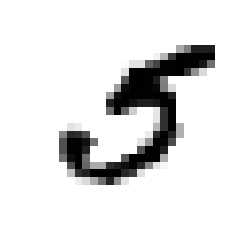

In [3]:
mnist = fetch_mldata('MNIST original', data_home='./')
mnist.data.shape
mnist
X, y = mnist['data'], mnist['target']
X.shape
y.shape
# Display 36,000th image
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, 
           interpolation = 'nearest')
plt.axis('off')
plt.show()
# Utilize the first 60,000 images as train set and the last 10,000 as holdout test set 
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [4]:
# Model 1: Random Forest Classifier using Train-Test Split
rfClf = RandomForestClassifier(n_estimators=100, max_leaf_nodes=10, n_jobs=-1)    
np.random.seed(seed = 9999)
replications = 10  # repeat the trial ten times
x_time = [] 
n = 0  
print('--- Time to Fit Random Forest Classifier ---')
while (n < replications): 
    start_time = time.clock()
    # generate 1 million random negative binomials and store in a vector
    rfClf.fit(X_train, y_train)
    end_time = time.clock()
    runtime = end_time - start_time  # seconds of wall-clock time
    x_time.append(runtime * 1000)  # report in milliseconds 
    print("replication", n + 1, ":", x_time[n], "milliseconds\n") 
    n = n + 1
with open('rf_fit.csv', 'wt') as f:
    writer = csv.writer(f, quoting = csv.QUOTE_NONNUMERIC, dialect = 'excel')
    writer.writerow('x_time')    
    for i in range(replications):
        writer.writerow(([x_time[i],]))
# preliminary analysis for this cell of the design
print(pd.DataFrame(x_time).describe())
y_predict = rfClf.predict(X_test)
# Performance measurement using F1-score
f1Score = f1_score(y_test, y_predict, average='weighted')
print('\nF1 Score: ', f1Score)

--- Time to Fit Random Forest Classifier ---
replication 1 : 24499.023 milliseconds

replication 2 : 24439.254 milliseconds

replication 3 : 24685.177999999993 milliseconds

replication 4 : 24854.206999999988 milliseconds

replication 5 : 25040.733000000004 milliseconds

replication 6 : 25164.65199999999 milliseconds

replication 7 : 25082.352000000014 milliseconds

replication 8 : 24973.33599999999 milliseconds

replication 9 : 24947.056000000004 milliseconds

replication 10 : 24939.22599999999 milliseconds

                  0
count     10.000000
mean   24862.501700
std      244.831807
min    24439.254000
25%    24727.435250
50%    24943.141000
75%    25023.883750
max    25164.652000

F1 Score:  0.7700107830031407


In [5]:
# Model 2: PCA using the Full Dataset
pca = PCA(n_components=0.95)
pca_time = []
n = 0  
print('--- Time to Identify Pricipal Components ---')
while (n < replications): 
    start_time = time.clock()
    # generate 1 million random negative binomials and store in a vector
    X_pca = pca.fit_transform(X) 
    end_time = time.clock()
    runtime = end_time - start_time  # seconds of wall-clock time
    pca_time.append(runtime * 1000)  # report in milliseconds 
    print("replication", n + 1, ":", pca_time[n], "milliseconds\n") 
    n = n + 1
with open('pca_fit.csv', 'wt') as f:
    writer = csv.writer(f, quoting = csv.QUOTE_NONNUMERIC, dialect = 'excel')
    writer.writerow('pca_time')    
    for i in range(replications):
        writer.writerow(([pca_time[i],]))
print(pd.DataFrame(pca_time).describe())
pca_explained_variance = pca.explained_variance_ratio_
print('Proportion of variance explained:', pca_explained_variance)
print('Number of principal components that represent 95% varibility:',len(pca_explained_variance))
# Dimension is reduced to 154 variables from 784 variables

--- Time to Identify Pricipal Components ---
replication 1 : 19632.34000000003 milliseconds

replication 2 : 19678.76000000001 milliseconds

replication 3 : 17167.65700000002 milliseconds

replication 4 : 17862.234999999997 milliseconds

replication 5 : 16884.805999999968 milliseconds

replication 6 : 17252.346999999987 milliseconds

replication 7 : 16670.65100000002 milliseconds

replication 8 : 18334.803999999964 milliseconds

replication 9 : 18381.10999999998 milliseconds

replication 10 : 17762.437000000034 milliseconds

                  0
count     10.000000
mean   17962.714700
std     1057.472211
min    16670.651000
25%    17188.829500
50%    17812.336000
75%    18369.533500
max    19678.760000
Proportion of variance explained: [0.09746116 0.07155445 0.06149531 0.05403385 0.04888934 0.04305227
 0.03278262 0.02889642 0.02758364 0.0234214  0.02106689 0.02037553
 0.01707064 0.0169402  0.01583382 0.01486345 0.01319358 0.01279014
 0.01187272 0.01152937 0.0106604  0.01009794 0.0095915

In [6]:
# Model 3: Random Forest Classifier and PCA using Train-Test Split
X_pca_train, X_pca_test = X_pca[:60000], X_pca[60000:]
rfClf_pca = RandomForestClassifier(n_estimators=100, max_leaf_nodes=10, n_jobs=-1)
x_pca_time = [] 
n = 0  
print('--- Time to Fit Random Forest Classifier using Principal Components ---')
while (n < replications): 
    start_time = time.clock()
    # generate 1 million random negative binomials and store in a vector
    rfClf_pca.fit(X_pca_train, y_train)
    end_time = time.clock()
    runtime = end_time - start_time  # seconds of wall-clock time
    x_pca_time.append(runtime * 1000)  # report in milliseconds 
    print("replication", n + 1, ":", x_pca_time[n], "milliseconds\n") 
    n = n + 1
with open('rf_pca_fit.csv', 'wt') as f:
    writer = csv.writer(f, quoting = csv.QUOTE_NONNUMERIC, dialect = 'excel')
    writer.writerow('x_pca_time')    
    for i in range(replications):
        writer.writerow(([x_pca_time[i],]))
print(pd.DataFrame(x_pca_time).describe())
y_predict_pca = rfClf_pca.predict(X_pca_test)
f1Score_pca = f1_score(y_test, y_predict_pca, average='weighted')
print('\nF1 Score: ', f1Score_pca)

--- Time to Fit Random Forest Classifier using Principal Components ---
replication 1 : 53265.513 milliseconds

replication 2 : 53098.703 milliseconds

replication 3 : 52840.45800000001 milliseconds

replication 4 : 52871.83499999992 milliseconds

replication 5 : 52142.231000000036 milliseconds

replication 6 : 53016.76500000008 milliseconds

replication 7 : 52061.09800000001 milliseconds

replication 8 : 51793.89100000003 milliseconds

replication 9 : 52209.15500000001 milliseconds

replication 10 : 51904.73699999996 milliseconds

                 0
count     10.00000
mean   52520.43860
std      549.71199
min    51793.89100
25%    52081.38125
50%    52524.80650
75%    52980.53250
max    53265.51300

F1 Score:  0.7670310742806677


In [7]:
# Model 4: Random Forest Classifier and PCA using Train-Test Split and Standard Scaler
mnist = fetch_mldata('MNIST original', data_home='./')
mnist.data.shape
mnist
X, y = mnist['data'], mnist['target']
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
pca = PCA(n_components=0.95)
pca_time = []
n = 0  
print('--- Time to Identify Pricipal Components ---')
while (n < replications): 
    start_time = time.clock()
    # generate 1 million random negative binomials and store in a vector
    X_pca = pca.fit_transform(X) 
    end_time = time.clock()
    runtime = end_time - start_time  # seconds of wall-clock time
    pca_time.append(runtime * 1000)  # report in milliseconds 
    print("replication", n + 1, ":", pca_time[n], "milliseconds\n") 
    n = n + 1
with open('pca_fit.csv', 'wt') as f:
    writer = csv.writer(f, quoting = csv.QUOTE_NONNUMERIC, dialect = 'excel')
    writer.writerow('pca_time')    
    for i in range(replications):
        writer.writerow(([pca_time[i],]))
print(pd.DataFrame(pca_time).describe())
pca_explained_variance = pca.explained_variance_ratio_
print('Proportion of variance explained:', pca_explained_variance)
print('Number of principal components that represent 95% varibility:',len(pca_explained_variance))
X_pca_train, X_pca_test = X_pca[:60000], X_pca[60000:]
rfClf_pca = RandomForestClassifier(n_estimators=100, max_leaf_nodes=10, n_jobs=-1)
x_pca_time = [] 
n = 0  
print('--- Time to Fit Random Forest Classifier using Principal Components ---')
while (n < replications): 
    start_time = time.clock()
    # generate 1 million random negative binomials and store in a vector
    rfClf_pca.fit(X_pca_train, y_train)
    end_time = time.clock()
    runtime = end_time - start_time  # seconds of wall-clock time
    x_pca_time.append(runtime * 1000)  # report in milliseconds 
    print("replication", n + 1, ":", x_pca_time[n], "milliseconds\n") 
    n = n + 1
with open('rf_pca_fit.csv', 'wt') as f:
    writer = csv.writer(f, quoting = csv.QUOTE_NONNUMERIC, dialect = 'excel')
    writer.writerow('x_pca_time')    
    for i in range(replications):
        writer.writerow(([x_pca_time[i],]))
print(pd.DataFrame(x_pca_time).describe())
y_predict_pca = rfClf_pca.predict(X_pca_test)
f1Score_pca = f1_score(y_test, y_predict_pca, average='weighted')
print('\nF1 Score: ', f1Score_pca)
#332 components from 784 variables 

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


--- Time to Identify Pricipal Components ---
replication 1 : 19984.32500000001 milliseconds

replication 2 : 20500.689999999962 milliseconds

replication 3 : 16845.016999999985 milliseconds

replication 4 : 16654.624000000127 milliseconds

replication 5 : 16373.34399999986 milliseconds

replication 6 : 19070.846000000074 milliseconds

replication 7 : 18993.126000000077 milliseconds

replication 8 : 18489.022999999863 milliseconds

replication 9 : 19049.180999999862 milliseconds

replication 10 : 18421.586000000163 milliseconds

                  0
count     10.000000
mean   18438.176200
std     1402.842901
min    16373.344000
25%    17239.159250
50%    18741.074500
75%    19065.429750
max    20500.690000
Proportion of variance explained: [0.05642719 0.04041226 0.03738273 0.02893    0.02520752 0.02192549
 0.01914282 0.01740684 0.01532232 0.01396087 0.01342175 0.01201421
 0.01113962 0.01090582 0.01027986 0.00994955 0.00931255 0.00919635
 0.008886   0.00863195 0.00821741 0.00798417 0.0076

In [8]:
# TA Jessica helped me with this project.
# Thank you for viewing my code. 